In [1]:
import numpy as np 
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

plt.style.use('seaborn')


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

C:\Users\Jesse\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
data_path = 'C:/Users/Jesse/Desktop/midterm_data/data/'
flights_df = pd.read_csv(data_path + 'flights.csv')

In [3]:
passengers = pd.read_csv(data_path + 'passengers.csv')

#### Top 10 airports by destination/Origin and Passengers

top 10 airports by origin vs destination done in task 9

In [23]:
origin_flights = flights_df.groupby('origin')['fl_date'].count().sort_values(ascending=False)[:10].reset_index().rename({'fl_date': 'Origin Flights'}, axis=1)

In [32]:
origin_passengers = passengers.groupby('origin')['passengers'].sum().sort_values(ascending=False)[:10].reset_index()
dest_passengers = passengers.groupby('dest')['passengers'].sum().sort_values(ascending=False)[:10].reset_index()

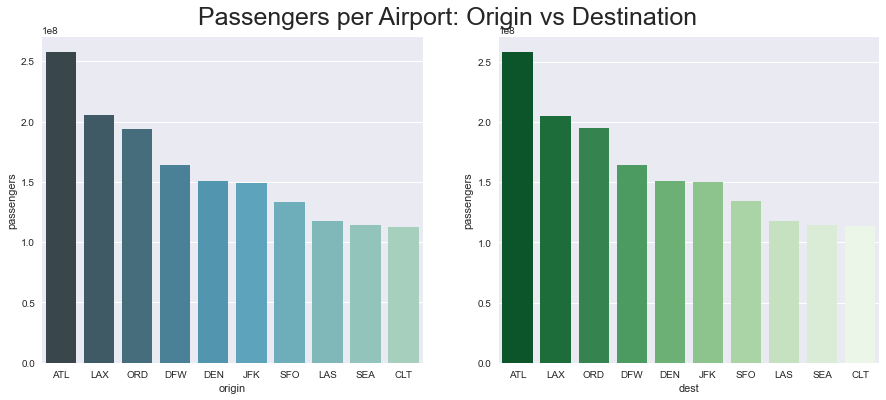

In [42]:
f, axes = plt.subplots(1, 2, figsize=(15,6))

sns.barplot(x='origin', y='passengers', data = origin_passengers, ax=axes[0], palette='GnBu_d')
sns.barplot(x='dest', y='passengers', data = dest_passengers, ax=axes[1], palette='Greens_r')

plt.suptitle('Passengers per Airport: Origin vs Destination', fontsize=25,y=0.95);


## Delays:   

In [43]:
# mean departure delay time vs passengers

In [48]:
busiest_airports20 = flights_df.groupby('origin')['fl_date'].count().sort_values(ascending=False)[:20].reset_index().rename({'fl_date': 'Origin Flights'}, axis=1)
busiest_airports20 = busiest_airports20['origin'].values

#### Top 20 Airports with mean DEPARTURE Delays

In [67]:
top20_delays_dep = flights_df.groupby('origin')['dep_delay'].mean().reset_index()
top20_delays_dep = top20_delays_dep.loc[top20_delays_dep['origin'].isin(busiest_airports20)].sort_values('dep_delay', ascending=False)

top20_delays_arr = flights_df.groupby('dest')['arr_delay'].mean().reset_index()
top20_delays_arr = top20_delays_arr.loc[top20_delays_arr['dest'].isin(busiest_airports20)].sort_values('arr_delay', ascending=False)

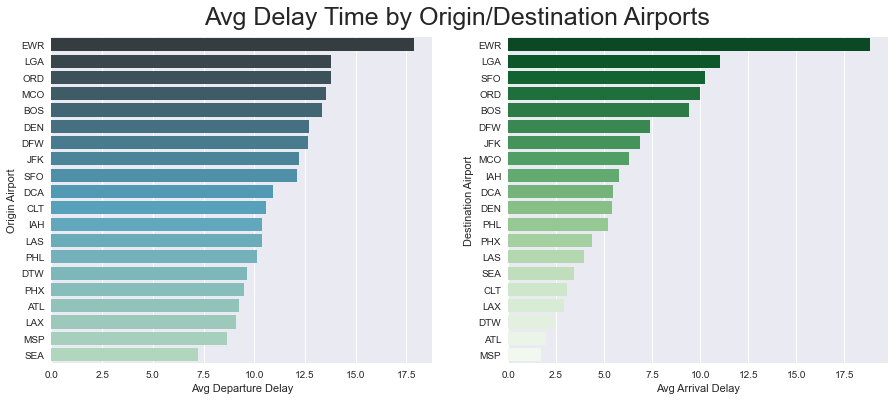

In [76]:
f, axes = plt.subplots(1, 2, figsize=(15,6))

sns.barplot(x='dep_delay', y='origin', data = top20_delays_dep, ax=axes[0], palette='GnBu_d')
sns.barplot(x='arr_delay', y='dest', data = top20_delays_arr, ax=axes[1], palette='Greens_r')

axes[0].set(ylabel='Origin Airport', xlabel='Avg Departure Delay')
axes[1].set(ylabel='Destination Airport', xlabel='Avg Arrival Delay')

plt.suptitle('Avg Delay Time by Origin/Destination Airports', fontsize=25,y=0.95);

In [ ]:
# Atlanta and LAX one of the more busier airports but the most lostwest arrival/departure delays

#### Top 20 Airports with Departure, arrival delay (>20 minutes) as percentage of flights (proportion)
        

In [107]:
total_flights_airport_origin = flights_df.loc[flights_df['dep_delay'].notna()].groupby('origin')['fl_date'].count().sort_values(ascending=False)[:20].reset_index()

In [115]:
delay_15_airport = flights_df.loc[flights_df['dep_delay'] > 20].groupby('origin')['fl_date'].count().sort_values(ascending=False)[:20].reset_index()
delay_15_airport_frac = pd.merge(left=total_flights_airport_origin, right=delay_15_airport, on='origin')
delay_15_airport_frac['frac'] = delay_15_airport_frac['fl_date_y']/delay_15_airport_frac['fl_date_x']
delay_15_airport_frac = delay_15_airport_frac.sort_values('frac', ascending=False)

delay_15_airport_frac

,origin,fl_date_x,fl_date_y,frac
14,EWR,310986,70258,0.225920
11,LGA,331572,62898,0.189696
1,ORD,769995,144688,0.187908
16,BOS,295851,54636,0.184674
18,MCO,277791,50859,0.183084
2,DFW,572724,103539,0.180783
8,SFO,351390,62987,0.179251
3,DEN,544907,95883,0.175962
19,JFK,252192,40903,0.162190
15,PHL,303002,48897,0.161375


In [121]:
# total flights
total_flights_airport_dest = flights_df.loc[flights_df['arr_delay'].notna()].groupby('dest')['fl_date'].count().sort_values(ascending=False)[:20].reset_index()

arr_delay_20_airport = flights_df.loc[flights_df['arr_delay'] > 20].groupby('dest')['fl_date'].count().sort_values(ascending=False)[:20].reset_index()
arr_delay20_frac = pd.merge(left=total_flights_airport_dest, right=arr_delay_20_airport, on='dest')
arr_delay20_frac['frac_delay'] = arr_delay20_frac['fl_date_y']/arr_delay20_frac['fl_date_x']
arr_delay20_frac = arr_delay20_frac.sort_values('frac_delay', ascending=False)
arr_delay20_frac

,dest,fl_date_x,fl_date_y,frac_delay
14,EWR,309044,86752,0.280711
11,LGA,329554,74136,0.224959
8,SFO,350405,76263,0.217642
16,BOS,295461,61096,0.206782
1,ORD,765558,141619,0.184988
19,JFK,251186,45248,0.180137
18,MCO,276806,47522,0.171680
15,PHL,301282,51167,0.169831
2,DFW,568634,93319,0.164111
17,DCA,278422,45463,0.163288


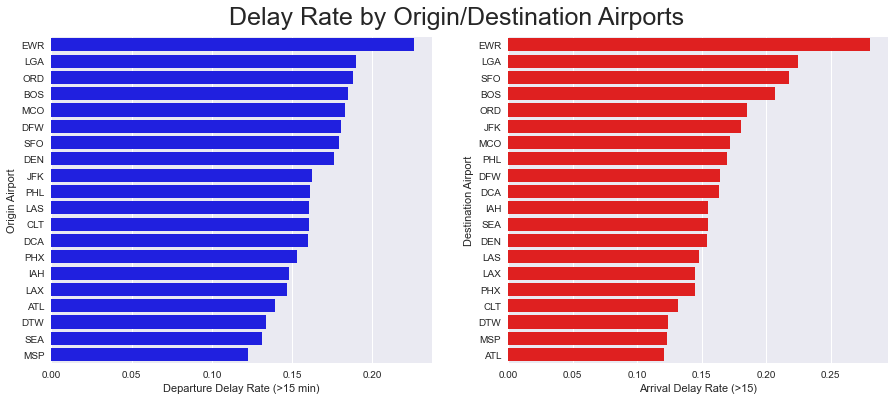

In [130]:
f, axes = plt.subplots(1, 2, figsize=(15,6))

sns.barplot(y='origin', x='frac', data = delay_15_airport_frac, ax=axes[0], color='blue')
sns.barplot(y='dest', x='frac_delay', data = arr_delay20_frac, ax=axes[1], color='red')

axes[0].set(ylabel='Origin Airport', xlabel='Departure Delay Rate (>15 min)')
axes[1].set(ylabel='Destination Airport', xlabel='Arrival Delay Rate (>15)')

plt.suptitle('Delay Rate by Origin/Destination Airports', fontsize=25,y=0.95);

In [4]:
# for a large airport ATL, LAX has suprisingly low avg departure  and arrival delay times. As well as low rates of delay per flights
# DTW, MSP also have low departure, arrival rates

# Newark liberty airport (EWR) in new york and LGA, BOS and ORD are amongst the worst interms of average delay times and delay rates >20 minutes
# 3 star rating with over 8000 reviews

#### Top 10  airports with different type of departure delays

In [21]:
busiest_airports = flights_df.groupby('origin')['fl_date'].count().sort_values(ascending=False)[:10].index
busiest_airports

Index(['ORD', 'ATL', 'DFW', 'DEN', 'CLT', 'LAX', 'SEA', 'SFO', 'PHX', 'IAH'], dtype='object', name='origin')

In [58]:
delays = flights_df.loc[flights_df['dep_delay'] > 0, ['origin', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']]
delays = delays.groupby('origin')['origin', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'].mean().reset_index()
delays = delays.loc[delays['origin'].isin(busiest_airports)]

delays

,origin,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
22,ATL,23.274023,5.985249,12.516015,0.067749,22.007733
74,CLT,19.404370,4.449081,10.068729,0.168109,28.688419
94,DEN,22.974460,3.989576,12.179572,0.039532,31.595763
95,DFW,24.010299,5.518256,9.692209,0.031249,28.024210
169,IAH,26.593270,7.801437,13.794337,0.029886,27.905815
196,LAX,24.431396,0.801362,12.586355,0.136171,27.310902
257,ORD,22.566777,5.304180,13.905083,0.025181,34.133006
272,PHX,22.611053,0.846659,9.265193,0.327565,26.822596
321,SEA,19.885252,2.682292,12.545841,0.085915,22.013761
323,SFO,22.071256,1.046892,12.301866,0.078325,34.322777


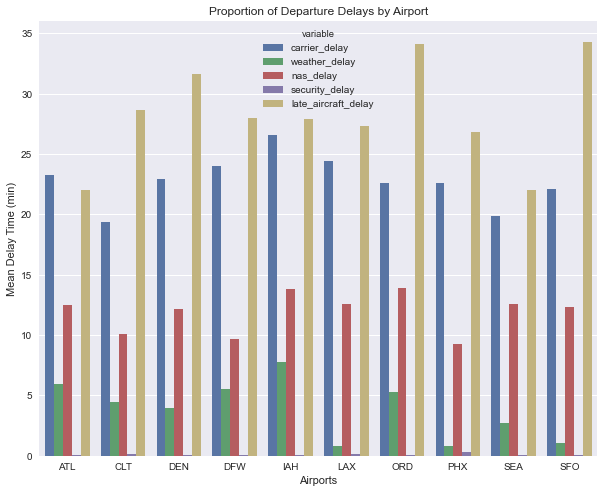

In [63]:
fig, ax1 = plt.subplots(figsize=(10,8))

df = pd.melt(delays,id_vars=['origin'])
df['value'] = df['value']

ax1 = sns.barplot(x='origin', y='value', hue='variable', data=df)
ax1.set(title='Proportion of Departure Delays by Airport', xlabel='Airports', ylabel='Mean Delay Time (min)');

# Late aircraft delays and Carrier delays account for a large portion of total Departure delay times

In [42]:
# Genrally the largest cause of departure delays are due to late aircraft delays, followed by Carrier delays, nas delays then weather delays.

# Chicago has a higher proportion of Late air craft delays, most likely due to its unique geographical location
# Which makes it a high flight traffic area

#### Taxi times per airport

In [ ]:
busiest_airports = flights_df.groupby('origin')['fl_date'].count().sort_values(ascending=False)[:10].index
busiest_airports

In [45]:
taxi = flights_df.loc[(flights_df['taxi_in'].notna()) & (flights_df['taxi_out'].notna())]

In [49]:
taxi = taxi.groupby('origin')['taxi_in', 'taxi_out'].mean().reset_index()
taxi = taxi.loc[taxi['origin'].isin(busiest_airports)]
taxi = pd.melt(taxi, id_vars=['origin'])

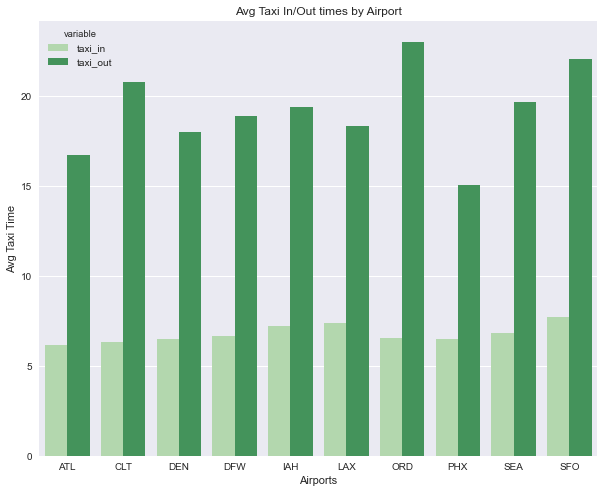

In [55]:
fig, ax2 = plt.subplots(figsize=(10,8))

ax2 = sns.barplot(x='origin', y='value', hue='variable',data=taxi, palette='Greens')
ax2.set(title='Avg Taxi In/Out times by Airport', xlabel='Airports', ylabel='Avg Taxi Time');

In [57]:
# Makes sense with above, Correlates with Large Taxi time of Chicago (ORD), which has highest Taxi out time out of all airports

In [64]:
# 73% of arrival delays started with a departure delay. As we saw above, late aircraft delays is the #1 cause of departure delays
# Having strategies at reducing departure delays will have a compounding effect in reducing over all departure and arrival delays
# across all airports

#### Cancelled flights by Origin top 10 airport

In [66]:
busiest_airports = flights_df.groupby('origin')['fl_date'].count().sort_values(ascending=False)[:10].index
cancel_codes = {'A':'Airline/Carrier', 'B':'Weather', 'C':'National Air System', 'D':'Security', 'X': 'Other'}

In [76]:
total_flights = flights_df.groupby('origin')['fl_date'].count().reset_index()
total_flights = total_flights.loc[total_flights['origin'].isin(busiest_airports)].rename({'fl_date': 'total_flights'}, axis=1)
cancel = flights_df.loc[flights_df['cancelled'] == 1].groupby('origin')['fl_date'].count().reset_index()
cancel = cancel.loc[cancel['origin'].isin(busiest_airports)].rename({'fl_date': 'cancelled_flights'}, axis=1)


In [82]:
frac_cancelled = pd.merge(right=total_flights, left=cancel, on='origin')
frac_cancelled['frac_cancelled'] = frac_cancelled['cancelled_flights']/frac_cancelled['total_flights']
frac_cancelled= frac_cancelled.sort_values('frac_cancelled', ascending=False)


,origin,cancelled_flights,total_flights,frac_cancelled
6,ORD,21099,790253,0.026699
3,DFW,12603,584688,0.021555
1,CLT,10070,501557,0.020077
9,SFO,6376,357626,0.017829
2,DEN,7613,552134,0.013788
4,IAH,3575,354379,0.010088
7,PHX,3544,355485,0.009969
5,LAX,4813,500840,0.009610
8,SEA,3173,379367,0.008364
0,ATL,4074,785850,0.005184


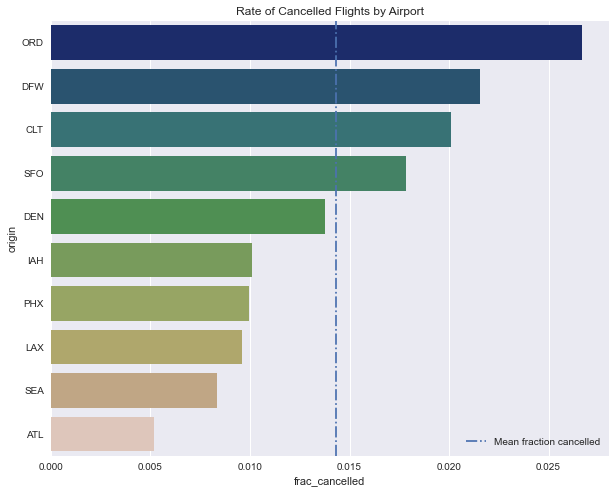

In [92]:
fig, ax3 = plt.subplots(figsize=(10,8))

ax3 = sns.barplot(x='frac_cancelled', y='origin', data=frac_cancelled, palette='gist_earth')
ax3.set(title='Rate of Cancelled Flights by Airport')

ax3.axvline(frac_cancelled['frac_cancelled'].mean(), label='Mean fraction cancelled', ls='-.')
ax3.legend()

In [93]:
# ORD, DFW, CLT and SFO are way above the cancelled mean fractions. 

# ATL, SEA, LAX have low cancellation rates

In [94]:
# ORD has a rating right now of 3/10 stars
# https://www.airlinequality.com/airport-reviews/chicago-ohare-airport/
# ranks one of the lowest review rated airports in US

#### Proportion of types of cancels by airport

In [5]:
cancel_codes = {'A':'Airline/Carrier', 'B':'Weather', 'C':'National Air System', 'D':'Security', 'X': 'Other'}
busiest_airports = flights_df.groupby('origin')['fl_date'].count().sort_values(ascending=False)[:10].index

In [6]:
cancel = flights_df.loc[flights_df['cancelled'] == 1, ['cancellation_code', 'origin']]
cancel = cancel.loc[cancel['origin'].isin(busiest_airports)].groupby(['origin', 'cancellation_code'])['cancellation_code'].count()
cancel = cancel.reset_index(name="new_name")
cancel['cancellation_code'] = cancel['cancellation_code'].replace(cancel_codes)

In [7]:
cancel

,origin,cancellation_code,new_name
0,ATL,Airline/Carrier,1299
1,ATL,Weather,2198
2,ATL,National Air System,575
3,ATL,Security,2
4,CLT,Airline/Carrier,3284
5,CLT,Weather,5938
6,CLT,National Air System,845
7,CLT,Security,3
8,DEN,Airline/Carrier,1652
9,DEN,Weather,5256


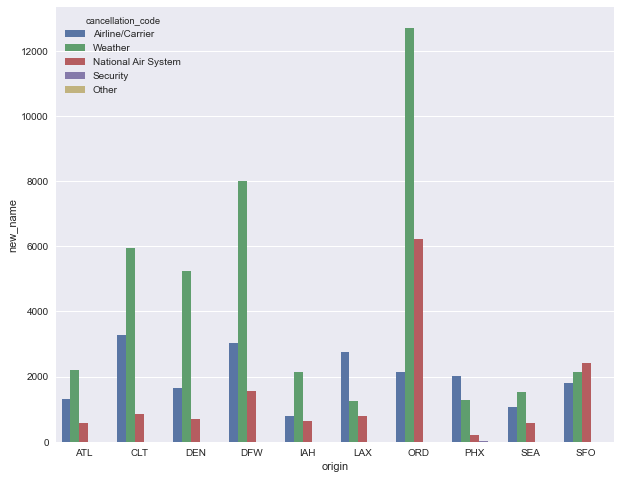

In [8]:
fig, ax4 = plt.subplots(figsize=(10,8))

ax4 = sns.barplot(x='origin', y='new_name', data=cancel, hue='cancellation_code')

In [10]:
# Again Chicago Airport is worse all around, has really bad weather.

# https://chicago.cbslocal.com/2019/08/18/chicago-flights-cancellations/
# Over 600 flights were cancelled due to thunder storms in Aug 2019
# https://chicago.cbslocal.com/2019/11/11/chicago-flights-canceled-2/
# 1200 flights were cancelled at chicago airport in 2019

# https://chicago.cbslocal.com/2018/11/26/ohare-midway-flight-delays-and-cancellations-amid-winter-storm/
# More then 400 flights cancelled due to winter storms

# Chicago has a history of all round bad weather.



# Note that LAX, ATL, DFW which have similar high traffic (High Passengers, high flights), 
# but ORD fares much worse in terms of over delay and cancellation rates

In [11]:
# See that majority of reasons that cause cancellation of flights are due to weather
# Second is Airline/Carrier reasons

In [1]:
# ORD, DFW, CLT all within high tornado zones which make sense for proprotionatly high cancellation rates due to weather

In [2]:
# ATL scores best for lowest cancellation rates, near lowest Delay Rates, near lowest mean delay wait times, 
# Yet one of the busiest airpots in the US in terms of passengers and flight traffic